In [1]:
import random
import tensorflow as tf
import librosa
import librosa.display
import IPython.display
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import pandas as pd
import csv

In [2]:
test_index_list = []
test_answer_list =[]
train_answer_list = []
size_ = 2
random_len = 0

filename = np.array(pd.read_csv('./ALL_filename.csv'))
answer = np.array(pd.read_csv('./answer_classification.csv'))

path_test='./test_train_image/all/mfcc/test'
path_train='./test_train_image/all/mfcc/train'

In [3]:
def make_rand_num(total_count):
    tf.set_random_seed(777)
    test_rate = 0.2 # test_train rating 변화
    rand_num = random.randint(0,total_count)
    range_num = int(total_count*test_rate)
    for i in range(range_num):
        while rand_num in test_index_list:
            rand_num = random.randint(0,total_count)
        test_index_list.append(rand_num)
    test_index_list.sort()
    
    #https://m.blog.naver.com/PostView.nhn?blogId=new27kr&logNo=220998501772&proxyReferer=https%3A%2F%2Fwww.google.com%2F

In [4]:
def save_image(mfccs, answer_, step):
    temp_name = filename[step][0].split(".")
    plt.figure(figsize=(0.78*size_,0.78*size_))
    librosa.display.specshow(mfccs)
    if step in test_index_list:
        if answer[step] == 0:
            plt.savefig(path_test+'/test_0/'+ ''.join(temp_name[0])+'.png')
        else answer[step] == 1:
            plt.savefig(path_test+'/test_1/'+ ''.join(temp_name[0])+'.png')

    else:
        if answer[step] == 0:
            plt.savefig(path_train+'/train_0/'+ ''.join(temp_name[0])+'.png')
        else answer[step] == 1:
            plt.savefig(path_train+'/train_1/'+ ''.join(temp_name[0])+'.png')

In [5]:
def labling(step,pointer):
    if pointer < random_len:
        if step == test_index_list[pointer]:
            test_answer_list.append(answer[step][0])
            pointer = pointer +1;
        else:
            train_answer_list.append(answer[step][0])
    return pointer
    #image 파일 저장

In [6]:
def save_test_lable_csv(name_file):
    path='./csv_file/'+name_file
    csvfile = open(path,"w",newline="")
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(map(lambda x: [x], test_answer_list))
    csvfile.close()

def save_train_lable_csv(name_file):
    path='./csv_file/'+name_file
    csvfile = open(path, "w",newline="")
    csvwriter = csv.writer(csvfile)
    csvwriter.writerows(map(lambda x: [x], train_answer_list))
    csvfile.close()    #csv파일 형태로 저장
    

In [7]:
def mfcc(total_count):
    pointer = 0
    step = 0
    print(len(filename))
    for step in range(total_count):
        #mfcc
        audio_path='./data/'+filename[step]
        print(audio_path)
        y, sr = librosa.load(audio_path[0]) 
        mfccs=librosa.feature.mfcc(y=y,sr=sr)
        # labeling
        pointer = labling(step,pointer)        
        #save image 
        save_image(mfccs, answer[step],step)        

In [8]:
def stft(total_count):
    pointer = 0
    for step in range(total_count):
        #mfcc
        audio_path='./data/'+filename[step]
        print(audio_path)
        y, sr = librosa.load(audio_path[0]) 
        stft_ = np.abs(librosa.stft(y))
        # labeling
        pointer = labling(step,pointer)        
        #save image 
        save_image(stft_, answer[step],step)

In [9]:
def mfcc_delta(total_count):
    pointer = 0
    for step in range(total_count):
        #mfcc
        audio_path='./data/'+filename[step]
        y, sr = librosa.load(audio_path[0]) 
        mfcc=librosa.feature.mfcc(y=y,sr=sr)
        mfccs = librosa.feature.delta(mfcc, order=2)
        # labeling
        pointer = labling(step,pointer)        
        #save image 
        save_image(mfccs, answer[step],step)

920
['C:/Users/dong/Desktop/test_train_image/data/101_1b1_Al_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/101_1b1_Pr_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/102_1b1_Ar_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/103_2b2_Ar_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Al_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Ar_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Ll_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Lr_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Pl_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/104_1b1_Pr_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/105_1b1_Tc_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/106_2b1_Pl_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/106_2b1_Pr_mc_LittC2SE.wav']
['C:/Users/dong/Deskt

C:\Users\dong\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b4_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/107_2b5_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/130_1p4_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b2_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b3_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b3_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/130_2b3_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/138_2p2_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Al_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Ar_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Ll_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Lr_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Pl_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/139_1b1_Pr_sc_Litt3200.wav']
['C:/Users/dong/Desktop/test_train_image/data/140_2b2_Ll_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/154_2b4_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_3b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_3b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_3b3_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/154_4b4_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/155_2b1_Al_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/156_2b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/156_2b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_2b2_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/163_8b3_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b3_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/176_1b4_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/188_1b1_Pl_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/188_1b1_Tc_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/189_1b2_Lr_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/190_1b1_Tc_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/191_2b1_Pl_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/191_2b1_Pr_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/191_2b2_Tc_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b1_Al_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b1_Ar_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b2_Al_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b2_Ar_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b3_Al_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/192_2b3_Ar_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/204_7p5_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/204_7p5_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/204_7p5_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/204_7p5_Tc_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Ll_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Lr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Pl_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_1b3_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_2b2_Pr_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_2b3_Al_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/test_train_image/data/205_2b3_Ar_mc_AKGC417L.wav']
['C:/Users/dong/Desktop/t

['C:/Users/dong/Desktop/test_train_image/data/221_2b3_Al_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/221_2b3_Ar_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/221_2b3_Lr_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/221_2b3_Pr_mc_LittC2SE.wav']
['C:/Users/dong/Desktop/test_train_image/data/222_1b1_Ar_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/222_1b1_Lr_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/222_1b1_Pr_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Al_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Ar_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Ll_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Lr_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Pl_sc_Meditron.wav']
['C:/Users/dong/Desktop/test_train_image/data/223_1b1_Pr_sc_Meditron.wav']
['C:/Users/dong/Desktop/t

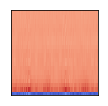

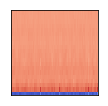

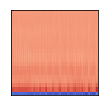

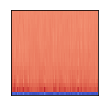

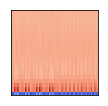

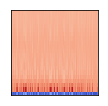

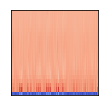

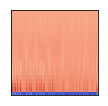

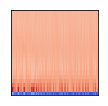

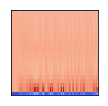

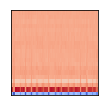

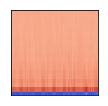

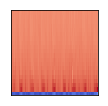

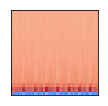

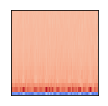

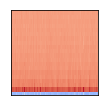

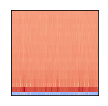

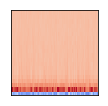

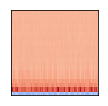

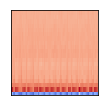

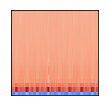

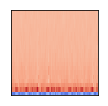

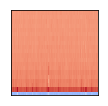

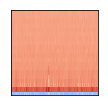

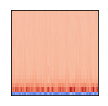

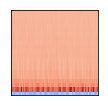

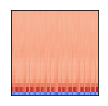

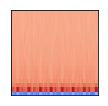

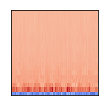

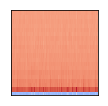

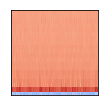

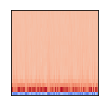

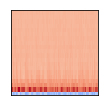

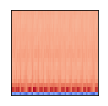

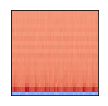

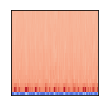

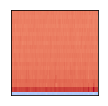

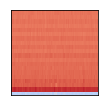

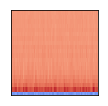

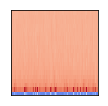

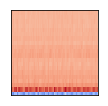

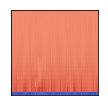

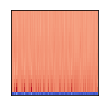

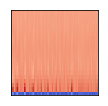

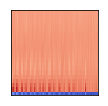

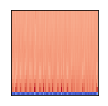

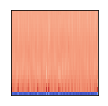

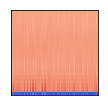

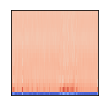

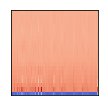

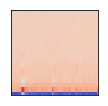

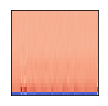

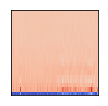

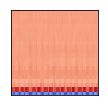

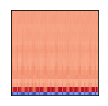

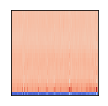

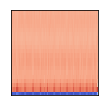

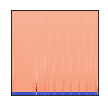

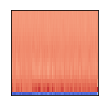

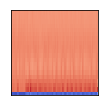

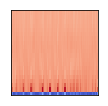

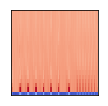

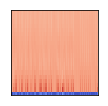

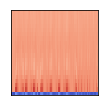

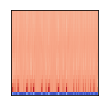

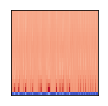

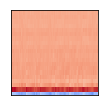

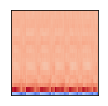

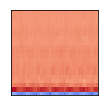

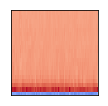

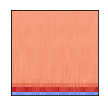

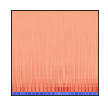

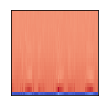

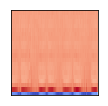

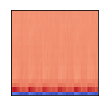

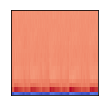

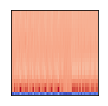

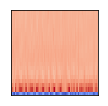

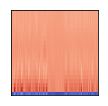

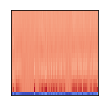

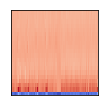

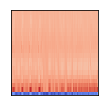

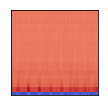

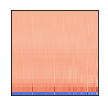

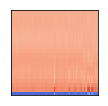

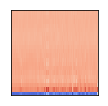

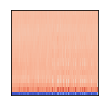

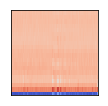

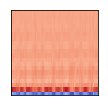

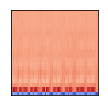

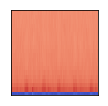

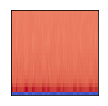

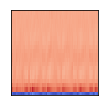

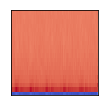

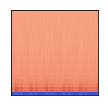

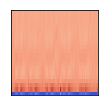

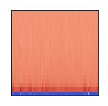

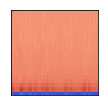

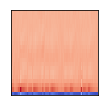

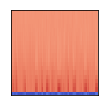

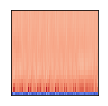

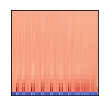

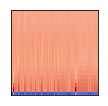

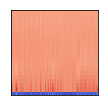

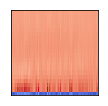

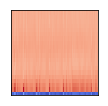

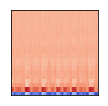

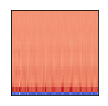

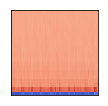

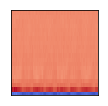

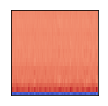

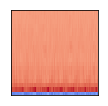

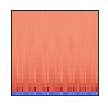

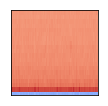

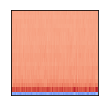

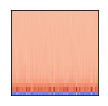

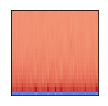

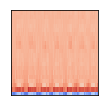

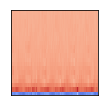

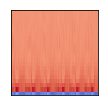

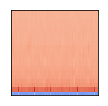

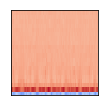

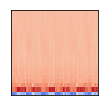

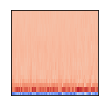

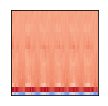

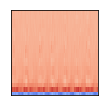

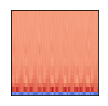

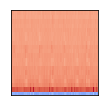

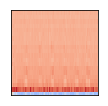

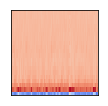

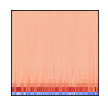

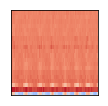

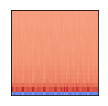

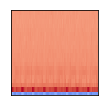

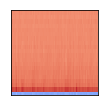

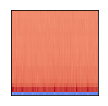

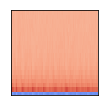

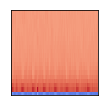

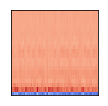

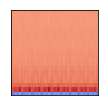

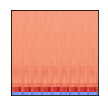

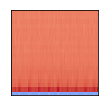

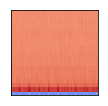

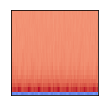

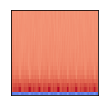

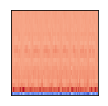

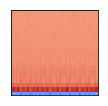

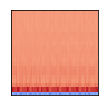

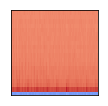

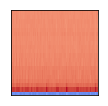

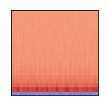

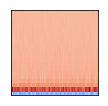

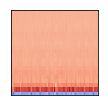

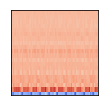

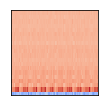

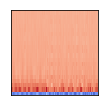

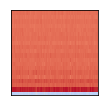

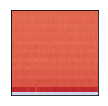

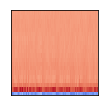

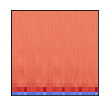

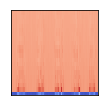

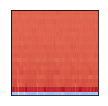

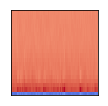

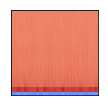

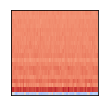

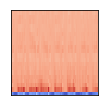

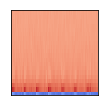

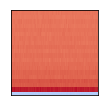

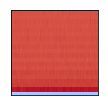

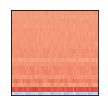

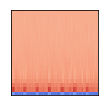

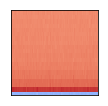

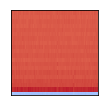

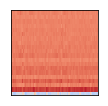

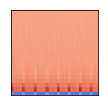

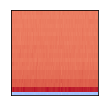

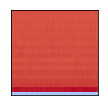

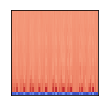

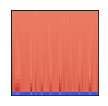

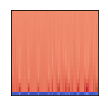

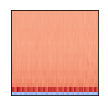

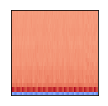

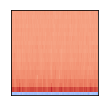

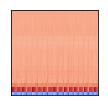

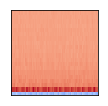

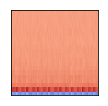

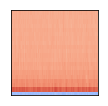

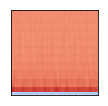

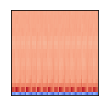

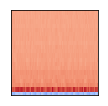

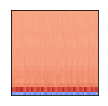

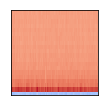

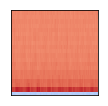

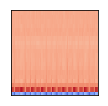

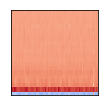

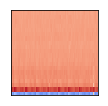

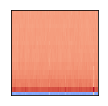

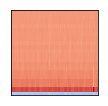

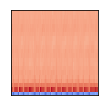

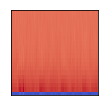

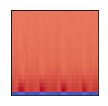

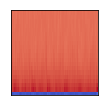

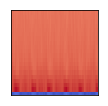

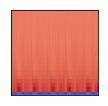

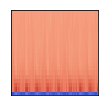

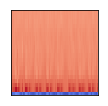

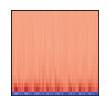

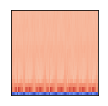

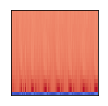

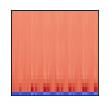

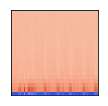

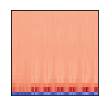

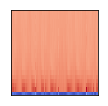

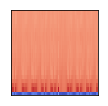

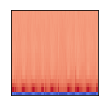

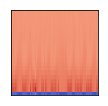

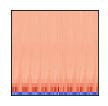

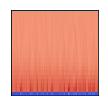

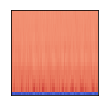

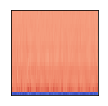

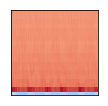

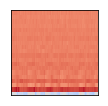

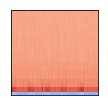

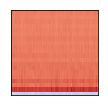

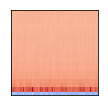

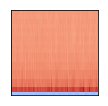

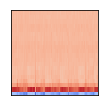

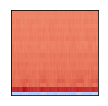

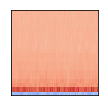

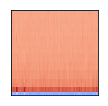

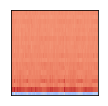

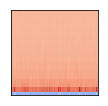

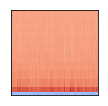

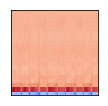

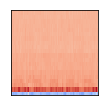

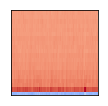

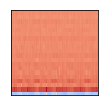

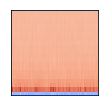

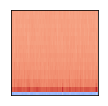

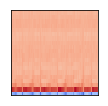

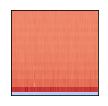

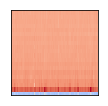

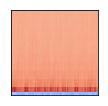

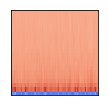

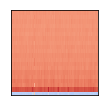

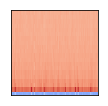

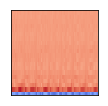

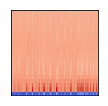

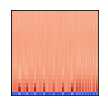

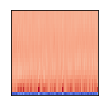

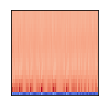

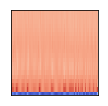

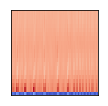

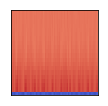

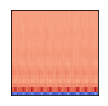

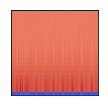

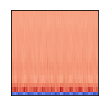

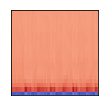

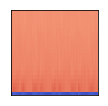

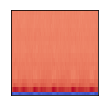

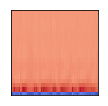

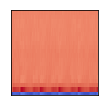

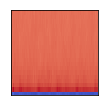

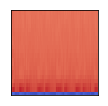

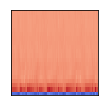

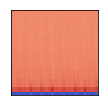

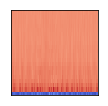

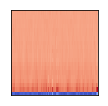

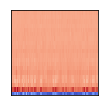

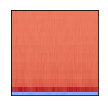

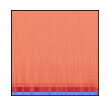

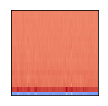

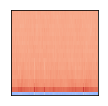

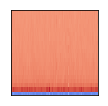

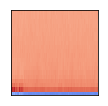

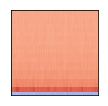

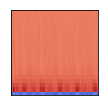

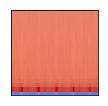

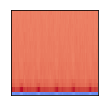

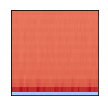

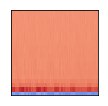

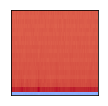

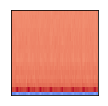

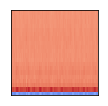

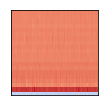

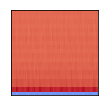

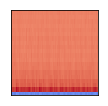

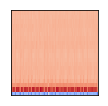

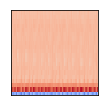

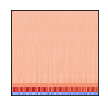

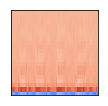

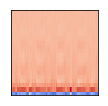

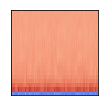

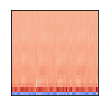

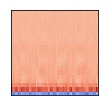

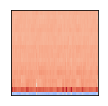

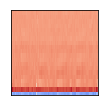

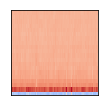

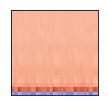

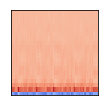

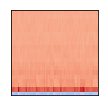

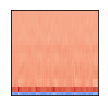

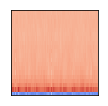

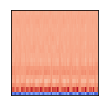

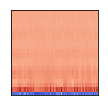

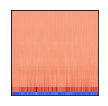

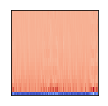

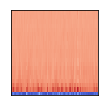

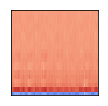

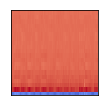

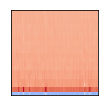

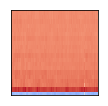

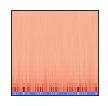

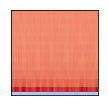

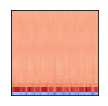

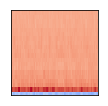

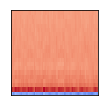

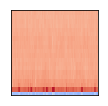

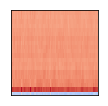

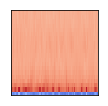

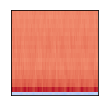

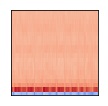

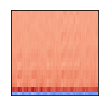

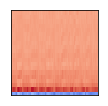

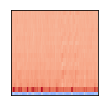

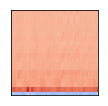

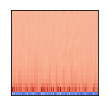

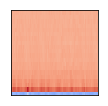

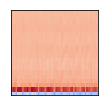

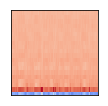

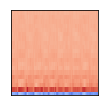

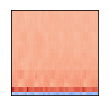

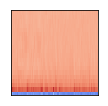

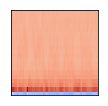

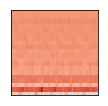

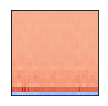

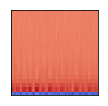

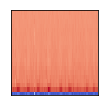

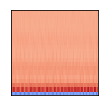

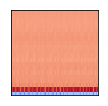

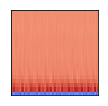

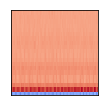

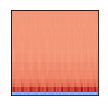

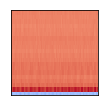

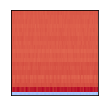

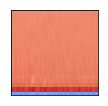

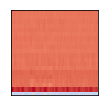

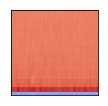

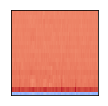

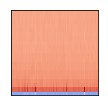

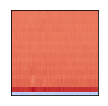

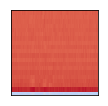

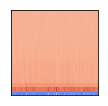

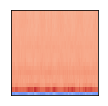

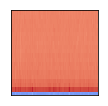

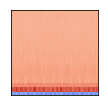

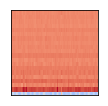

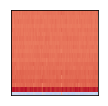

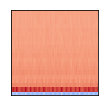

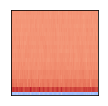

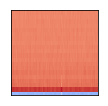

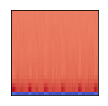

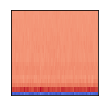

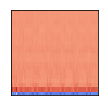

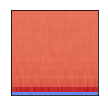

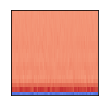

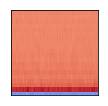

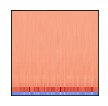

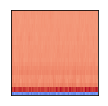

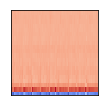

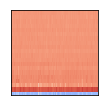

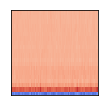

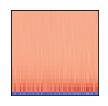

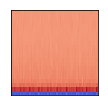

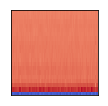

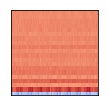

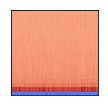

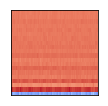

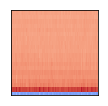

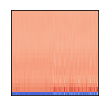

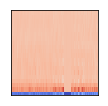

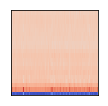

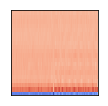

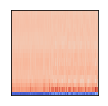

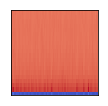

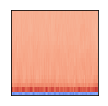

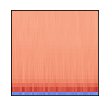

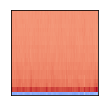

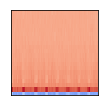

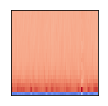

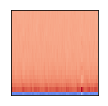

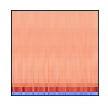

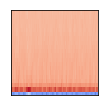

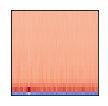

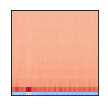

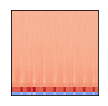

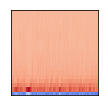

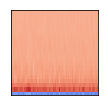

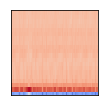

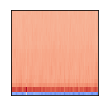

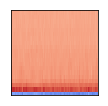

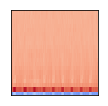

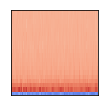

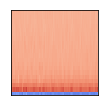

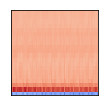

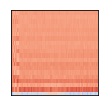

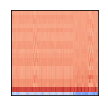

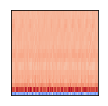

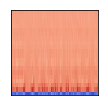

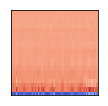

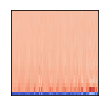

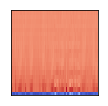

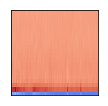

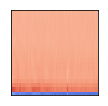

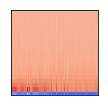

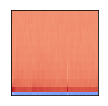

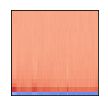

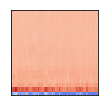

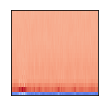

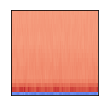

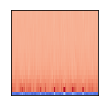

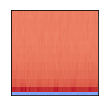

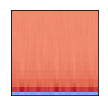

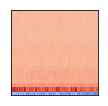

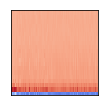

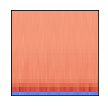

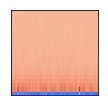

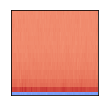

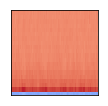

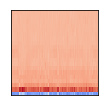

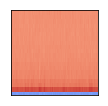

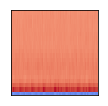

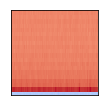

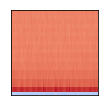

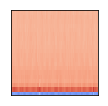

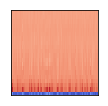

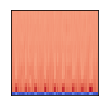

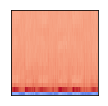

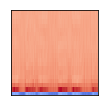

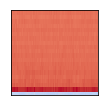

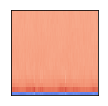

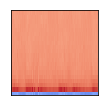

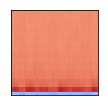

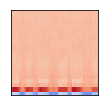

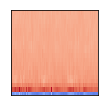

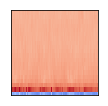

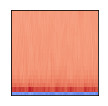

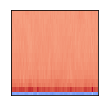

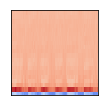

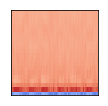

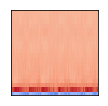

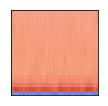

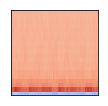

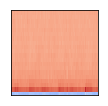

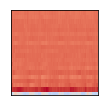

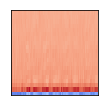

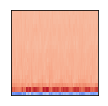

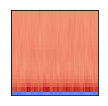

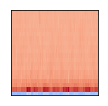

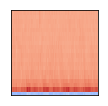

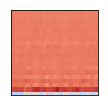

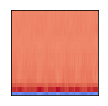

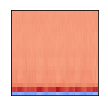

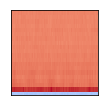

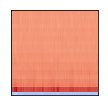

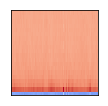

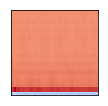

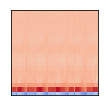

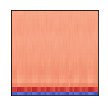

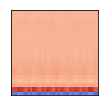

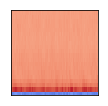

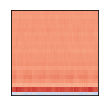

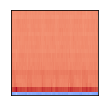

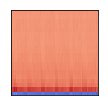

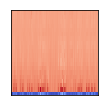

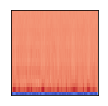

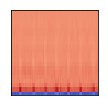

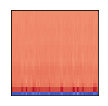

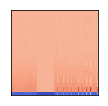

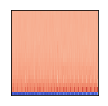

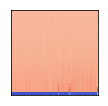

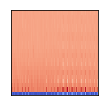

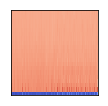

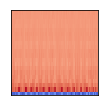

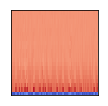

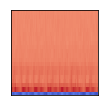

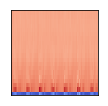

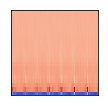

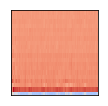

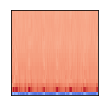

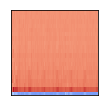

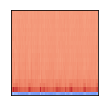

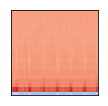

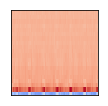

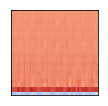

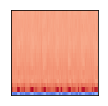

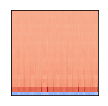

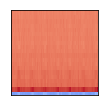

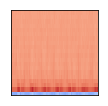

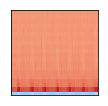

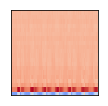

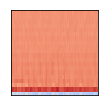

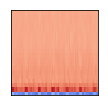

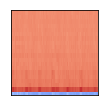

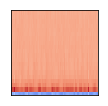

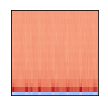

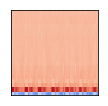

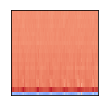

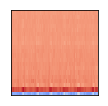

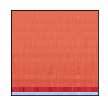

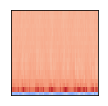

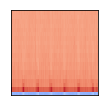

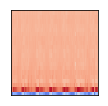

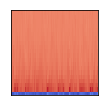

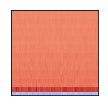

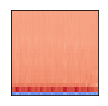

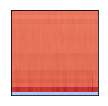

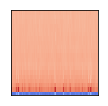

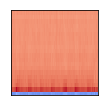

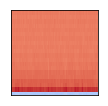

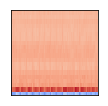

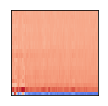

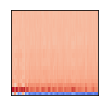

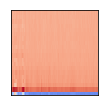

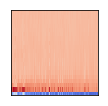

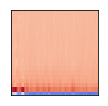

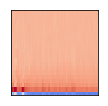

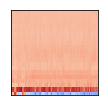

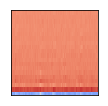

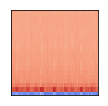

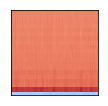

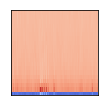

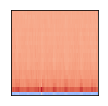

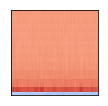

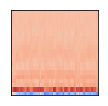

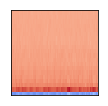

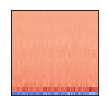

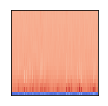

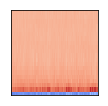

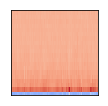

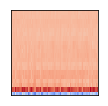

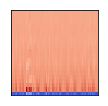

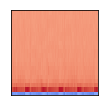

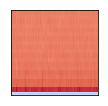

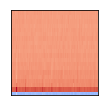

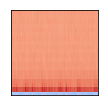

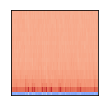

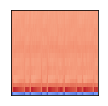

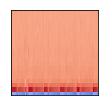

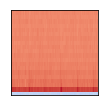

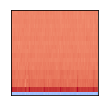

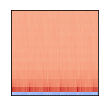

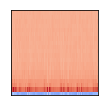

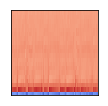

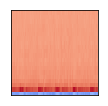

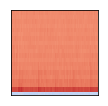

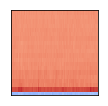

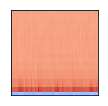

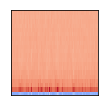

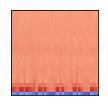

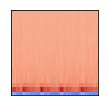

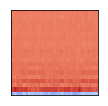

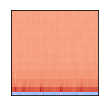

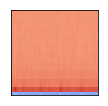

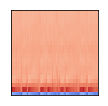

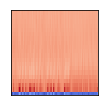

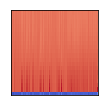

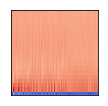

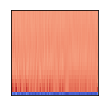

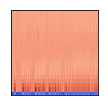

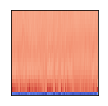

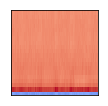

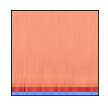

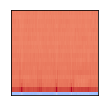

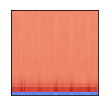

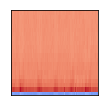

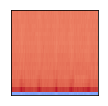

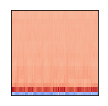

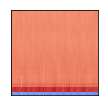

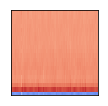

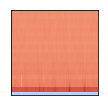

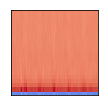

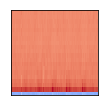

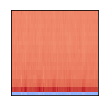

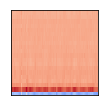

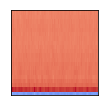

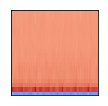

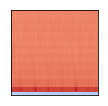

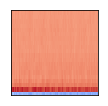

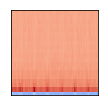

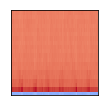

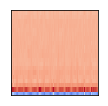

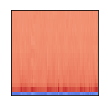

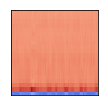

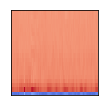

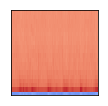

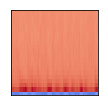

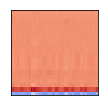

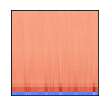

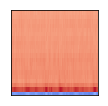

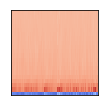

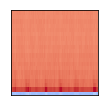

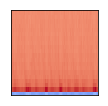

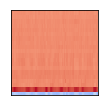

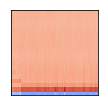

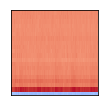

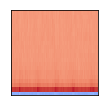

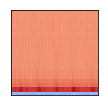

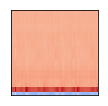

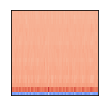

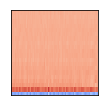

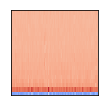

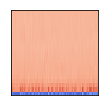

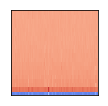

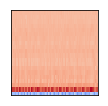

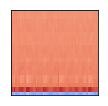

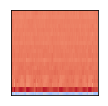

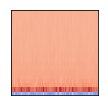

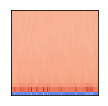

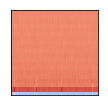

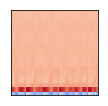

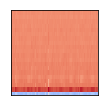

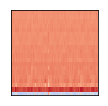

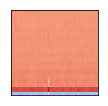

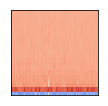

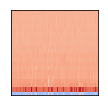

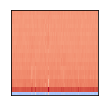

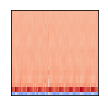

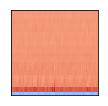

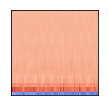

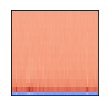

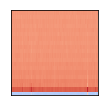

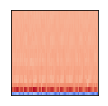

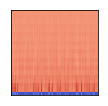

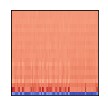

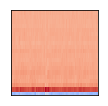

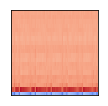

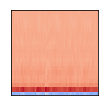

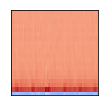

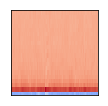

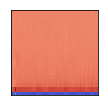

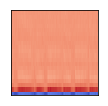

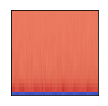

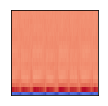

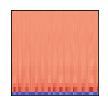

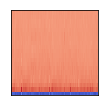

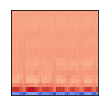

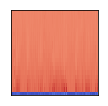

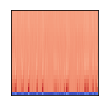

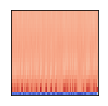

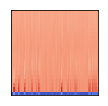

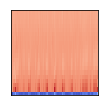

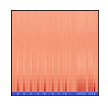

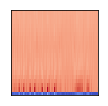

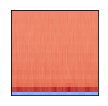

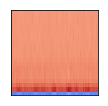

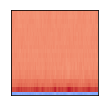

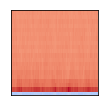

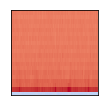

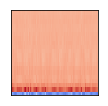

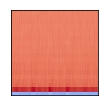

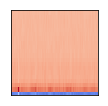

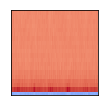

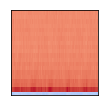

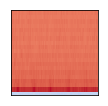

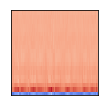

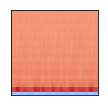

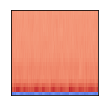

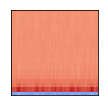

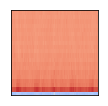

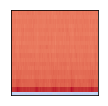

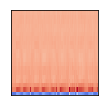

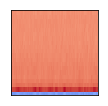

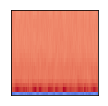

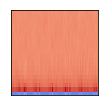

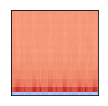

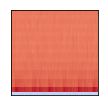

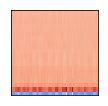

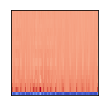

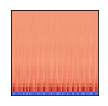

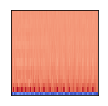

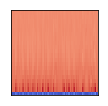

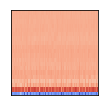

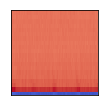

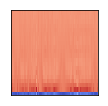

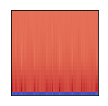

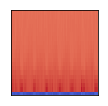

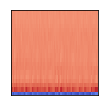

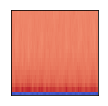

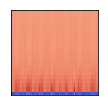

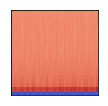

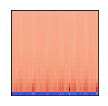

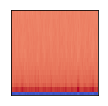

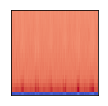

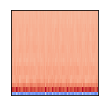

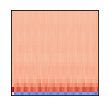

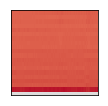

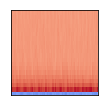

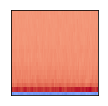

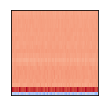

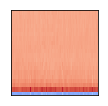

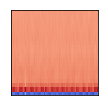

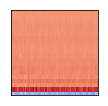

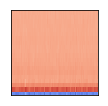

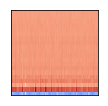

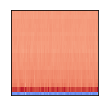

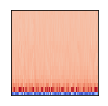

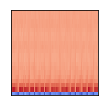

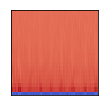

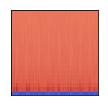

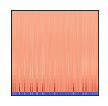

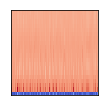

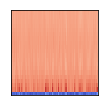

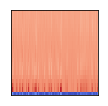

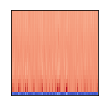

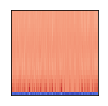

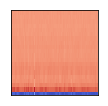

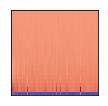

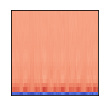

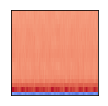

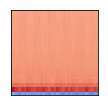

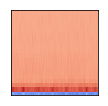

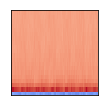

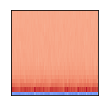

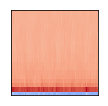

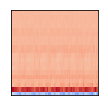

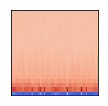

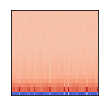

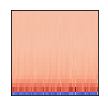

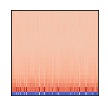

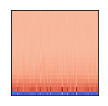

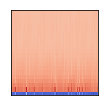

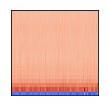

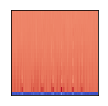

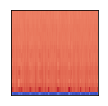

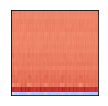

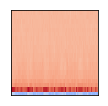

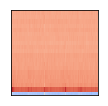

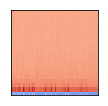

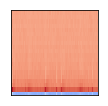

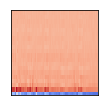

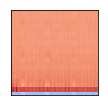

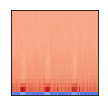

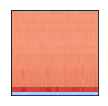

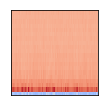

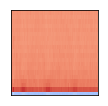

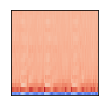

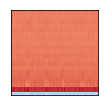

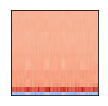

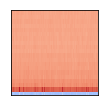

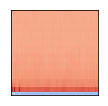

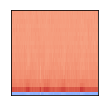

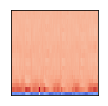

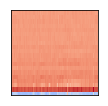

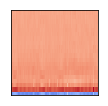

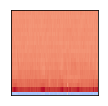

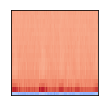

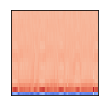

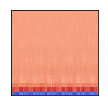

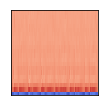

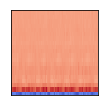

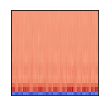

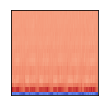

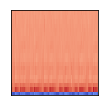

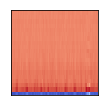

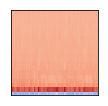

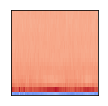

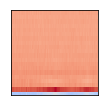

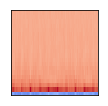

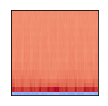

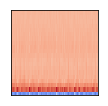

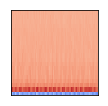

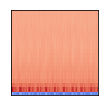

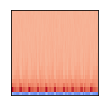

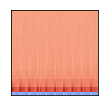

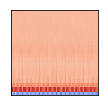

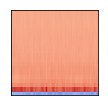

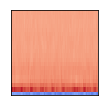

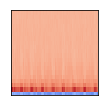

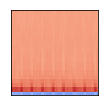

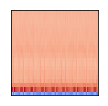

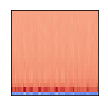

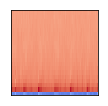

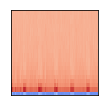

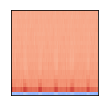

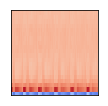

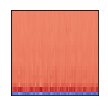

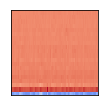

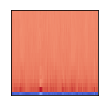

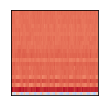

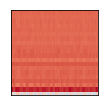

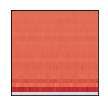

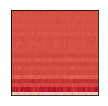

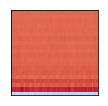

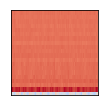

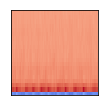

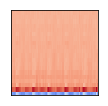

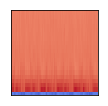

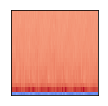

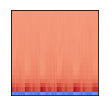

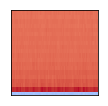

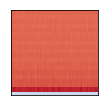

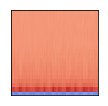

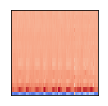

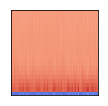

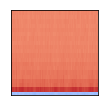

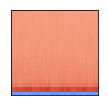

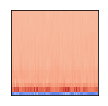

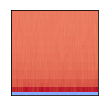

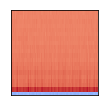

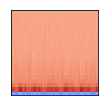

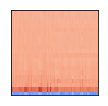

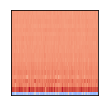

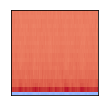

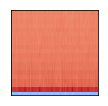

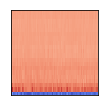

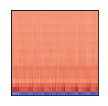

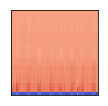

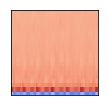

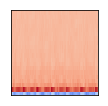

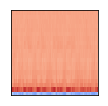

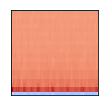

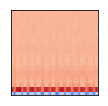

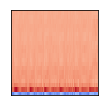

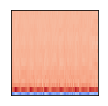

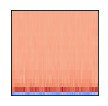

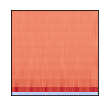

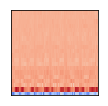

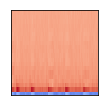

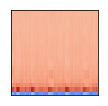

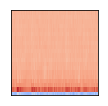

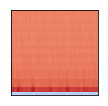

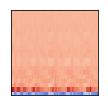

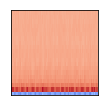

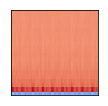

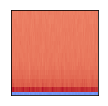

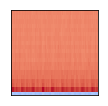

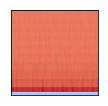

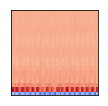

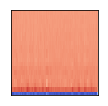

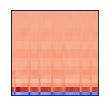

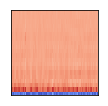

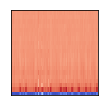

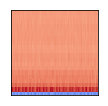

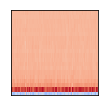

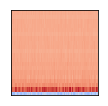

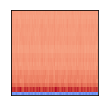

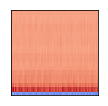

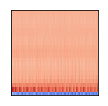

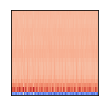

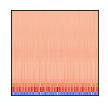

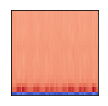

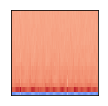

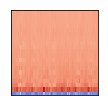

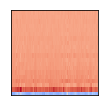

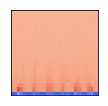

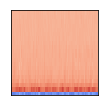

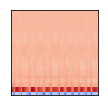

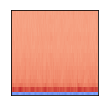

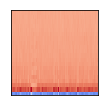

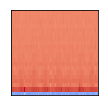

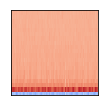

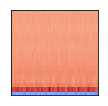

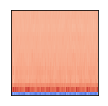

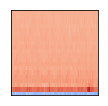

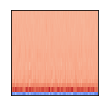

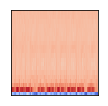

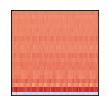

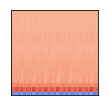

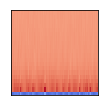

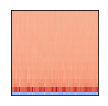

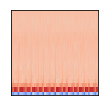

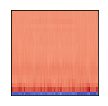

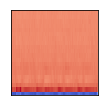

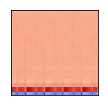

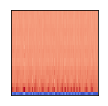

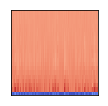

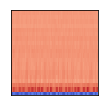

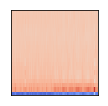

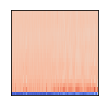

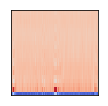

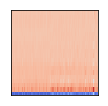

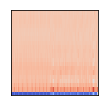

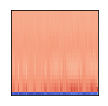

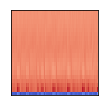

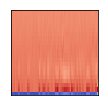

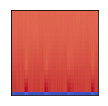

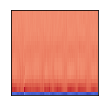

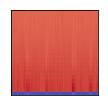

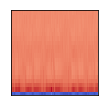

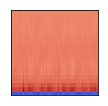

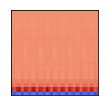

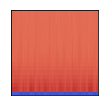

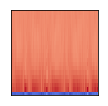

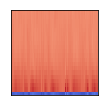

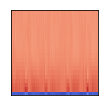

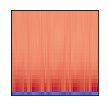

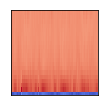

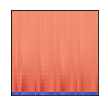

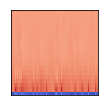

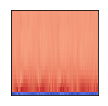

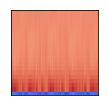

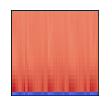

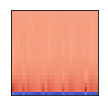

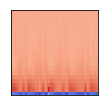

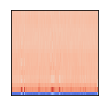

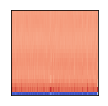

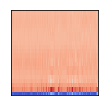

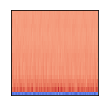

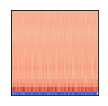

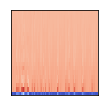

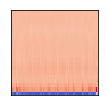

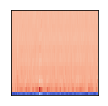

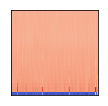

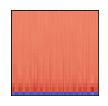

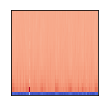

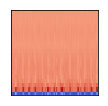

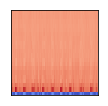

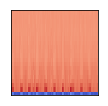

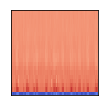

In [10]:
#main

make_rand_num(920)
random_len = len(test_index_list)
mfcc(920)
#mfcc_delta(188)
#stft(188)

#save_test_lable_csv('SC_mfcc_delta_test_lable.csv')
#save_train_lable_csv('SC_mfcc_delta_train_lable.csv')


